In [214]:
## importing libraray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

In [216]:
data =pd.read_csv('D:/Lecture file/25 th lecture 29 march/Position_Salaries.csv')
print(f'Salary position data \n { data.head()}')

Salary position data 
             Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


### EDA

In [95]:
data.shape

(10, 3)

In [97]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [99]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [101]:
X = data['Level'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [103]:
level_to_predict = np.array([[6.5]])

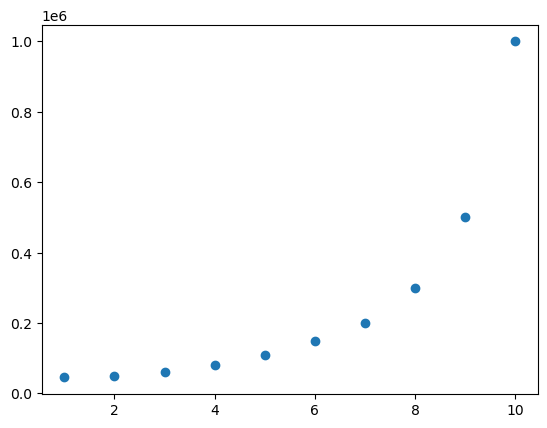

In [105]:
plt.scatter(X,y)
plt.savefig("D:/linear reg scatter plot.png")

### Training data model on linear regression 

In [108]:
salary_lin = LinearRegression()
salary_lin_train=salary_lin.fit(X,y)



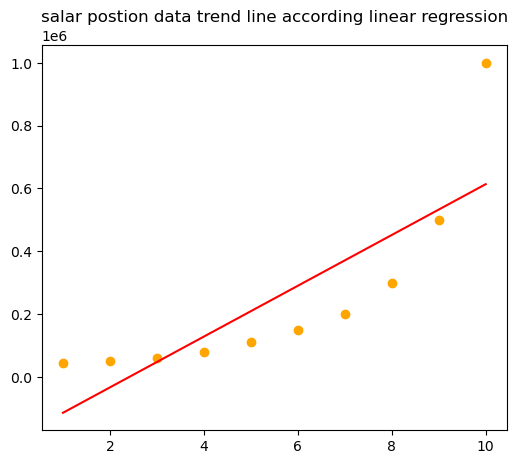

In [110]:
plt.figure(figsize=(6,5))
plt.scatter(X,y,color = 'orange')
plt.title("salar postion data trend line according linear regression")
plt.plot(X,salary_lin.predict(X) ,color ='red')
plt.savefig("D:/linear reg trend line plot.png")

In [116]:
y_pred =salary_lin_train.predict(X)

In [120]:
r2_sqaure =r2_score(y,y_pred)
print(f'salary postion data R2_sqaure value by polynomial is : {r2_sqaure}')

salary postion data R2_sqaure value by polynomial is : 0.6690412331929895


In [122]:
mse = mean_squared_error(y, y_pred)
print(f'salary postion data MSE value by polynomial is : {mse.round()}')

salary postion data MSE value by polynomial is : 26695878788.0


In [124]:
rmse = np.sqrt(mse)
print(f'salary postion data RMSE value by polynomial is : {rmse.round()}')

salary postion data RMSE value by polynomial is : 163389.0


In [126]:
mae = mean_absolute_error(y, y_pred)
print(f'salary postion data Mae value by polynomial is :{mae.round()}')

salary postion data Mae value by polynomial is :128455.0


In [210]:
### prediction of regional manager level 6.5 salary according to linear regression
pred_salary_lin=salary_lin_train.predict(level_to_predict)
print(f'salary ragional manager level 6.5 is around :{pred_salary_lin.round()} thousand')

salary ragional manager level 6.5 is around :[[330379.]] thousand


### polynomial regression 

In [150]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import joblib

In [152]:
salary_poly = PolynomialFeatures(degree =5)
print('Loaded the polynomial features for salary position data')

Loaded the polynomial features for salary position data


In [154]:
X_poly =salary_poly.fit_transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [178]:
salary_lin2 = LinearRegression().fit(X_poly,y)
y_pred_poly = salary_lin2.predict(X_poly)
y_pred_poly

array([[ 43895.1048956 ],
       [ 53836.82983705],
       [ 57065.26806523],
       [ 77286.71328647],
       [112263.40326306],
       [152736.59673623],
       [201349.65034936],
       [291571.09557096],
       [506617.71561785],
       [998377.62237821]])

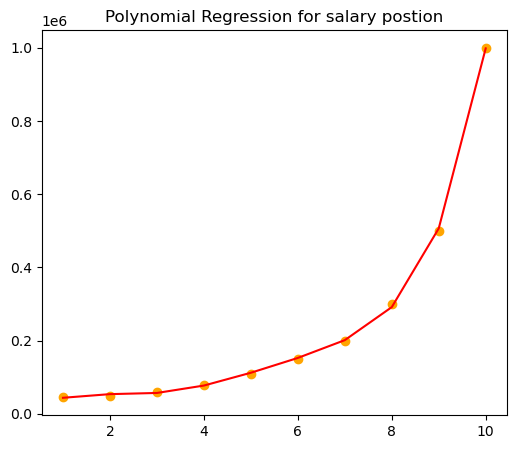

In [180]:
plt.figure(figsize=(6,5))
plt.scatter(X,y,color = 'orange')
plt.title("Polynomial Regression for salary postion")
plt.plot(X,salary_lin2.predict(X_poly), color = 'red')
plt.savefig("D:/polynomial reg plot.png")

<Axes: xlabel='Level', ylabel='Salary'>

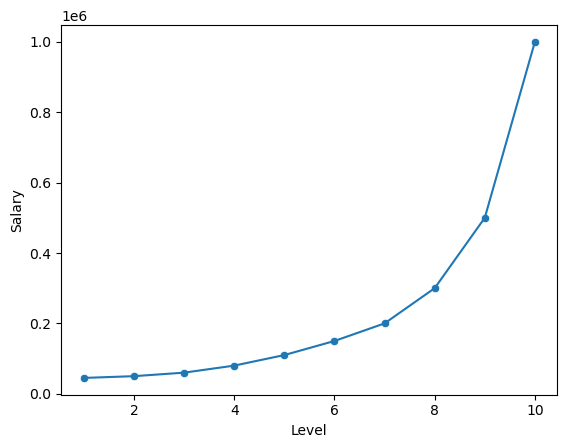

In [186]:
sns.scatterplot(data = data, x = 'Level', y = 'Salary')
sns.lineplot(data = data, x = 'Level', y = 'Salary')


### Training and validiation on polynomial regression

In [189]:
r2_sqaure =r2_score(y,y_pred_poly)
print(f'salary postion data r2_sqaure value by polynomial is : { r2_sqaure} ')


salary postion data r2_sqaure value by polynomial is : 0.9997969027099755 


In [191]:
mse = mean_squared_error(y, y_pred_poly)
print(f'salary postion data MSE value by polynomial is : {mse.round()}')

salary postion data MSE value by polynomial is : 16382284.0


In [193]:
rmse = np.sqrt(mse)
print(f'salary postion data RMSE value by polynomial is : {rmse.round()}')

salary postion data RMSE value by polynomial is : 4048.0


In [195]:
mae = mean_absolute_error(y,y_pred_poly )
print(f'salary postion data mean_absolute_erro value by polynomial is: {mae.round()}')

salary postion data mean_absolute_erro value by polynomial is: 3361.0


In [212]:
### prediction of regional manager level 6.5 salary according to polynomial regression
prediction_salary_poly=salary_poly.transform(level_to_predict)
poly_pred_salary =salary_lin2.predict(prediction_salary_poly)
print(f' By ploynomial regression regional manegar level 6.5 salary ia : {poly_pred_salary.round()}thousand')

 By ploynomial regression regional manegar level 6.5 salary ia : [[174878.]]thousand


### Linear regression plot and Polynomial Regression Plot comparision

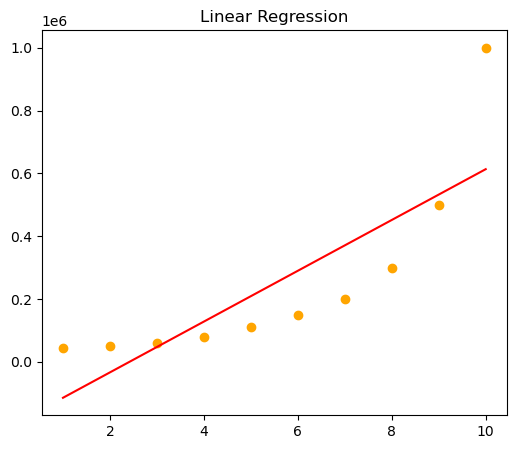

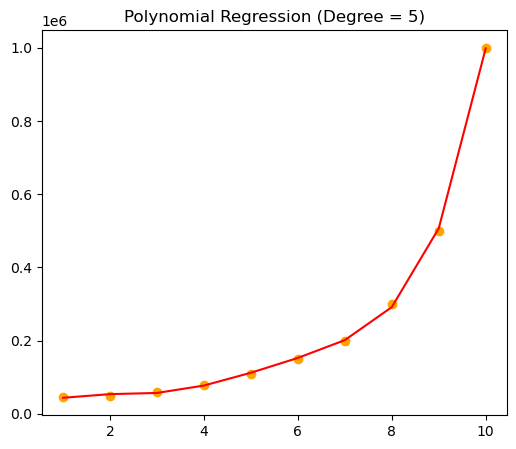

In [57]:
# Linear Regression Plot
plt.figure(figsize=(6,5))
plt.scatter(X,y,color = 'orange')
plt.plot(X,salary_lin.predict(X) ,color ='red')
plt.title('Linear Regression')

# Polynomial Regression Plot

plt.figure(figsize=(6,5))
plt.scatter(X,y,color = 'orange')
plt.title("Polynomial Regression for salary postion")
plt.plot(X,salary_lin2.predict(X_poly), color = 'red')
plt.title('Polynomial Regression (Degree = 5)')

plt.savefig("linear reg vs polynomial reg plots")
plt.show()

### saving the model

In [60]:
joblib.dump(salary_poly,'salary_postion_pred.joblib')

['salary_postion_pred.joblib']